In [34]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


In [2]:
results = pd.read_csv('final_results_43.csv', index_col=0)
ms_results = pd.read_csv('MS_results_43.csv', index_col=0)
sample_info = pd.read_csv('sample_info_43.csv', index_col=0)

In [6]:
df = pd.read_csv('exp_mat_43.csv', index_col=0)
df.columns = df.columns.map(int)

df = df[sample_info.index]

In [5]:
import NaiveDE

In [8]:
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info, dfm, 'np.log(total_count)').T

In [9]:
X = sample_info[['x', 'y']].values

In [12]:
sres = results.query('qval < 0.05 & g != "log_total_count"').copy()

In [64]:
sres.l.value_counts()

217.494828     21
93.963664       7
503.428645      5
40.594851       3
1165.270931     2
17.538077       1
Name: l, dtype: int64

In [13]:
import SpatialDE

In [68]:
histology_results, patterns = SpatialDE.spatial_patterns(X, res, sres, 5, 200, verbosity=1)

iter 0, ELBO: -6.43e+10
iter 1, ELBO: -3.32e+10, delta_ELBO: 3.11e+10
iter 2, ELBO: -3.32e+10, delta_ELBO: 1.40e+03
iter 3, ELBO: -3.32e+10, delta_ELBO: 4.56e+02
iter 4, ELBO: -3.32e+10, delta_ELBO: 4.20e+01
iter 5, ELBO: -3.32e+10, delta_ELBO: 1.73e+00
iter 6, ELBO: -3.32e+10, delta_ELBO: 2.31e+01
iter 7, ELBO: -3.32e+10, delta_ELBO: 2.33e+01
iter 8, ELBO: -3.32e+10, delta_ELBO: 9.56e-01
iter 9, ELBO: -3.32e+10, delta_ELBO: 3.74e+00
iter 10, ELBO: -3.32e+10, delta_ELBO: 7.00e+00
iter 11, ELBO: -3.32e+10, delta_ELBO: 1.17e+01
iter 12, ELBO: -3.32e+10, delta_ELBO: 1.88e+01
iter 13, ELBO: -3.32e+10, delta_ELBO: 2.12e+00
iter 14, ELBO: -3.32e+10, delta_ELBO: 4.34e+00
iter 15, ELBO: -3.32e+10, delta_ELBO: 9.67e-01
iter 16, ELBO: -3.32e+10, delta_ELBO: 3.14e+00
iter 17, ELBO: -3.32e+10, delta_ELBO: 2.13e-02
iter 18, ELBO: -3.32e+10, delta_ELBO: 1.18e-04
iter 19, ELBO: -3.32e+10, delta_ELBO: 0.00e+00
Converged on iter 19


In [69]:
K_hat = len(histology_results.pattern.unique())
K_hat

5

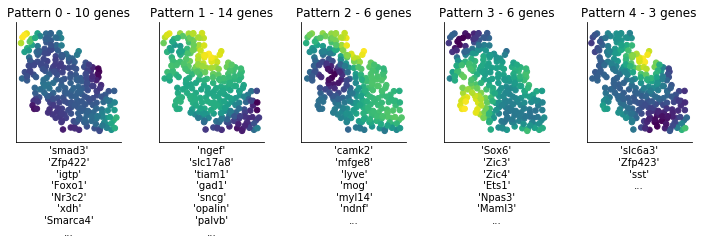

In [72]:
figsize(10, 3.5)
for i, Ci in enumerate(histology_results.sort_values('pattern').pattern.unique()):
    C = patterns[Ci]
    plt.subplot(1, K_hat, i + 1)
    plt.scatter(X[:,0], -X[:,1], c=C, s=30, rasterized=True)
    plt.axis('equal')
    plt.title('Pattern {} - {} genes'.format(Ci, histology_results.query('pattern == @Ci').shape[0] ))
    
    xlab = '\n'.join(histology_results.query('pattern == @Ci').sort_values('membership')['g'].tolist()[:7])
    plt.xlabel(xlab + '\n...')
    
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.savefig('SF_AEH.pdf', bbox_inches='tight')

In [73]:
for i in histology_results.sort_values('pattern').pattern.unique():
    
    print('Pattern {}'.format(i))
    print(', '.join(histology_results.query('pattern == @i').sort_values('membership')['g'].tolist()))
    print()

Pattern 0
'smad3', 'Zfp422', 'igtp', 'Foxo1', 'Nr3c2', 'xdh', 'Smarca4', 'Foxd3', 'slc17a7', 'fbll1'

Pattern 1
'ngef', 'slc17a8', 'tiam1', 'gad1', 'sncg', 'opalin', 'palvb', 'th', 'slc1a2', 'htr3a', 'foxj1', 'slc5a7', 'pdgfra', 'ctss'

Pattern 2
'camk2', 'mfge8', 'lyve', 'mog', 'myl14', 'ndnf'

Pattern 3
'Sox6', 'Zic3', 'Zic4', 'Ets1', 'Npas3', 'Maml3'

Pattern 4
'slc6a3', 'Zfp423', 'sst'



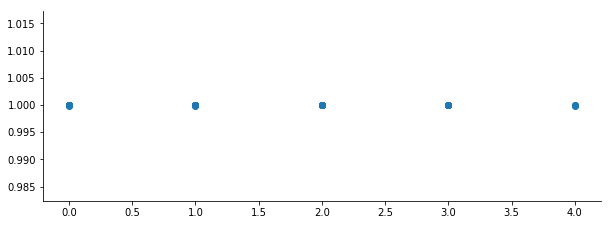

In [74]:
plt.scatter(histology_results.pattern, histology_results.membership);

In [76]:
histology_results.to_csv('sf_aeh_results.csv')